#  Project Proposal

I am delving into the Olympic dataset with SportsStats, which encompasses records of Olympic athletes since 1896. This dataset includes detailed information about Olympic games, athletes, and events. Our goal is to uncover correlations and insights from this extensive data, linking various variables and uncovering hidden facts that span over 120 years. The insights gained could help improve Olympic performance and devise advantageous strategies for future games. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Entity Relationship Diagram

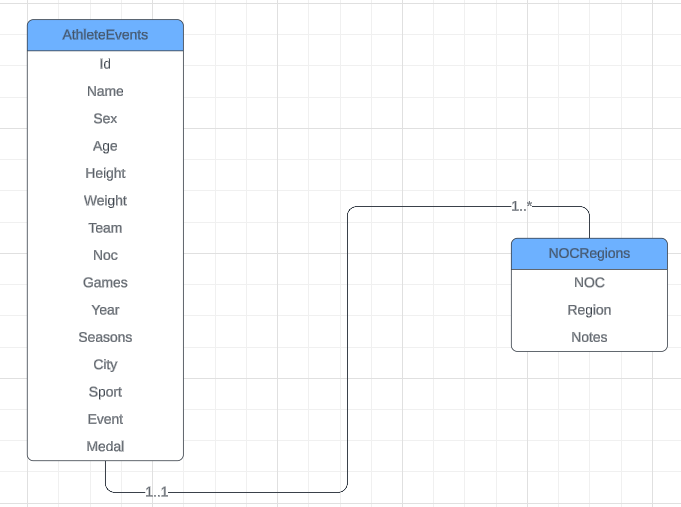

### Data Cleaning

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Medal'].fillna('None', inplace=True)

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Drop the 'Games' columns
df.drop(columns=['Games'], inplace=True)

In [10]:
# Rename the 'Team' column to 'Country'
df.rename(columns={'Team': 'Country'}, inplace=True)

### Feature Engineering 
I created two new metrics named Body Mass Index (BMI) which helps to understand athletes’ body mass which helps to identify if there are optimal BMI ranges for medal-winning athletes in different sports. And other metric Age group helps in identifying athletes’ performance among different age groups. 

In [26]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 30, 100], labels=['Young', 'Mid-age', 'Experienced'])
df['Height_m'] = df['Height'] / 100  
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)
bmi_by_age_group = df.groupby(['Sport', 'Age Group'])['BMI'].mean().unstack().fillna(0)
print(bmi_by_age_group)

Age Group             Young    Mid-age  Experienced
Sport                                              
Aeronautics        0.000000  22.997319     0.000000
Alpine Skiing     23.381973  24.023858    24.755204
Alpinism          22.997319  22.997319    22.997319
Archery           22.875320  23.188301    23.726439
Art Competitions  23.331313  23.003618    23.014342
...                     ...        ...          ...
Tug-Of-War        24.992257  24.524291    26.359731
Volleyball        22.308511  22.656585    22.781004
Water Polo        24.007113  24.109045    24.575368
Weightlifting     26.838345  26.868965    27.514414
Wrestling         24.197535  24.636669    25.193466

[66 rows x 3 columns]


In [27]:
medal_counts = df[df['Medal'].notna()].groupby(['Sport', 'Age Group'])['Medal'].count().unstack().fillna(0)
print(medal_counts)

Age Group         Young  Mid-age  Experienced
Sport                                        
Aeronautics           0        1            0
Alpine Skiing      6564     1855          410
Alpinism              1       11           13
Archery            1119      551          664
Art Competitions     79      541         1643
...                 ...      ...          ...
Tug-Of-War           39       83           48
Volleyball         1920     1140          344
Water Polo         1913     1405          528
Weightlifting      2013     1446          478
Wrestling          3397     2873          884

[66 rows x 3 columns]


### Hypothesis

1. Age Distribution Hypothesis:
I believe Athletes' age distribution will be skewed towards younger ages in their 20s and 30s.

2. Height and Weight Distribution Hypothesis:
I think Athletes' height and weight will show considerable variation based on their sport.

3. Gender Distribution Hypothesis:
The dataset may reveal historical gender disparities in sports participation, with a potentially higher number of male athletes. 

## Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

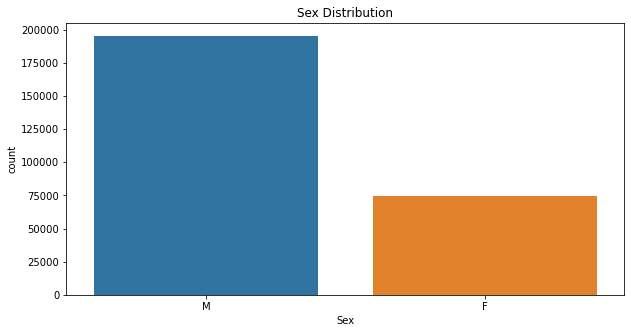

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.show()

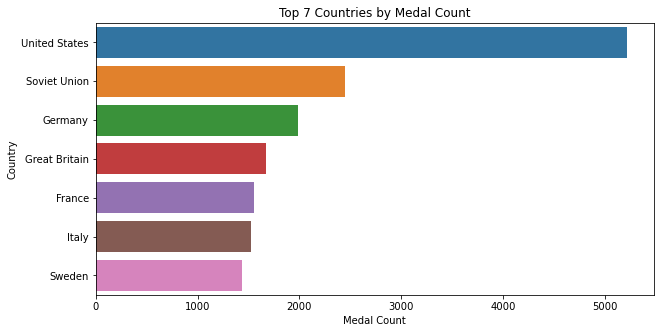

In [13]:
plt.figure(figsize=(10, 5))
medal_counts = df[df['Medal'] != 'None'].groupby('Country')['Medal'].count().sort_values(ascending=False).head(7)
sns.barplot(x=medal_counts.values, y=medal_counts.index)
plt.title('Top 7 Countries by Medal Count')
plt.xlabel('Medal Count')
plt.show()

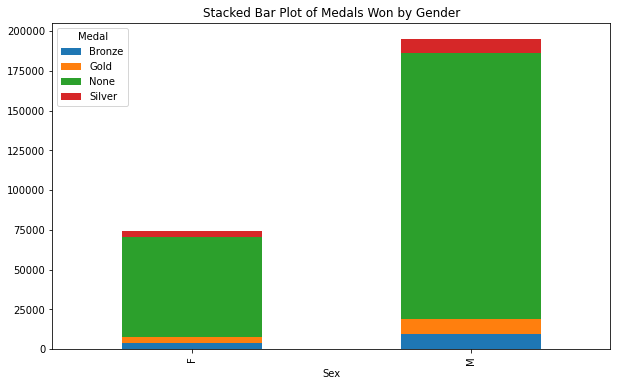

In [14]:
medals_by_gender = df.groupby(['Sex', 'Medal']).size().unstack().fillna(0)
medals_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Medals Won by Gender')
plt.xlabel('Sex')
plt.show()


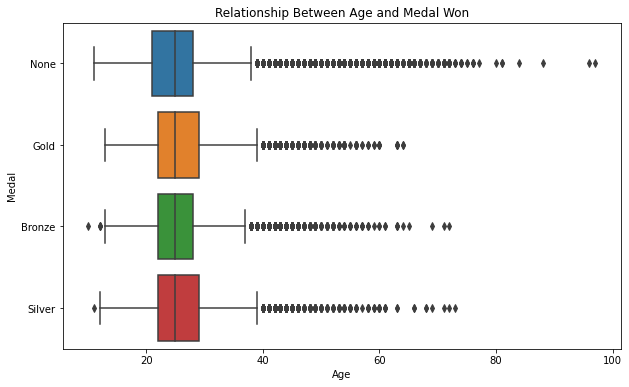

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Medal')
plt.title('Relationship Between Age and Medal Won')
plt.xlabel('Age')
plt.show()

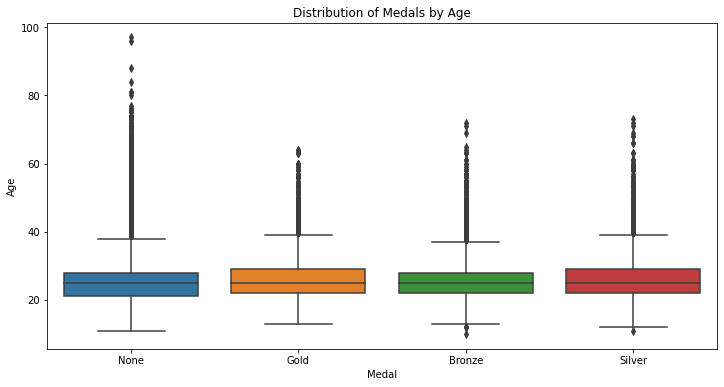

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Medal", y="Age", data=df)
plt.title("Distribution of Medals by Age")
plt.show()

### Measure of Central Tendency

In [16]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = stats.mode(df['Age'])[0][0]

mean_age, median_age, mode_age

(25.45830293217553, 25.0, 23.0)

In [17]:
mean_height = df['Height'].mean()
median_height = df['Height'].median()
mode_height = stats.mode(df['Height'])[0][0]

mean_height, median_height, mode_height

(175.33895686492983, 175.33896987366376, 175.33896987366376)

In [18]:
mean_weight = df['Weight'].mean()
median_weight = df['Weight'].median()
mode_weight = stats.mode(df['Weight'])[0][0]

mean_weight, median_weight, mode_weight

(70.70191831118954, 70.70239290053351, 70.70239290053351)

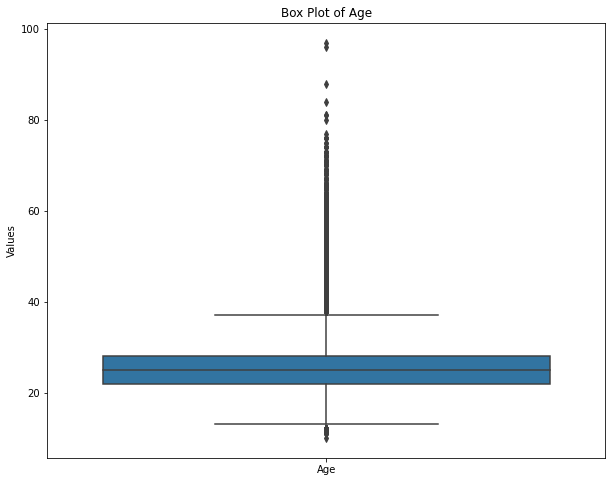

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Age']])
plt.title('Box Plot of Age')
plt.ylabel('Values')
plt.show()

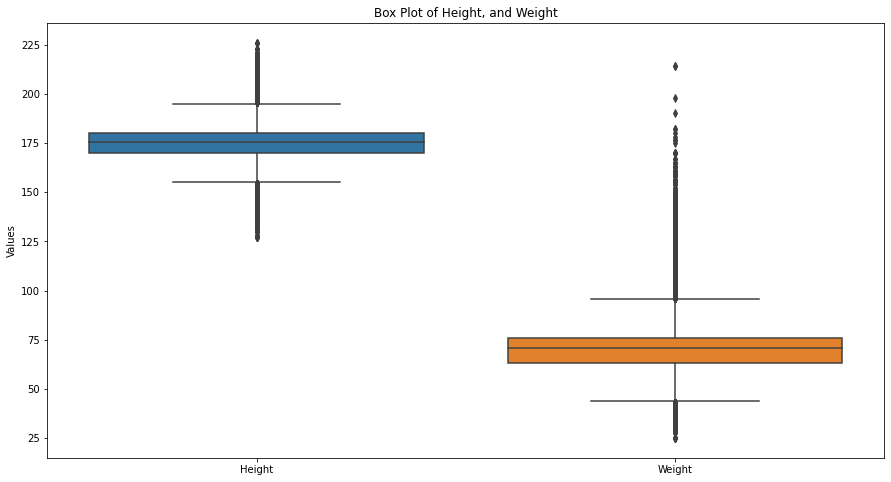

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Height', 'Weight']])
plt.title('Box Plot of Height, and Weight')
plt.ylabel('Values')
plt.show()

### Measure of Dispersion

In [22]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print("Min age and Max age: {} to {}".format(min_age, max_age))

Min age and Max age: 10.0 to 97.0


In [76]:
min_height = df['Height'].min()
max_height = df['Height'].max()
print("Min height and Max height: {} to {}".format(min_height, max_height))

Min height and Max height: 127.0 to 226.0


In [75]:
min_weight = df['Weight'].min()
max_weight = df['Weight'].max()
print("Min weight and Max weight: {} to {}".format(min_weight, max_weight))

Min weight and Max weight: 25.0 to 214.0


### Correlation

In [24]:
correlation = df[['Height', 'Weight']].corr()
print(correlation)

          Height    Weight
Height  1.000000  0.786635
Weight  0.786635  1.000000


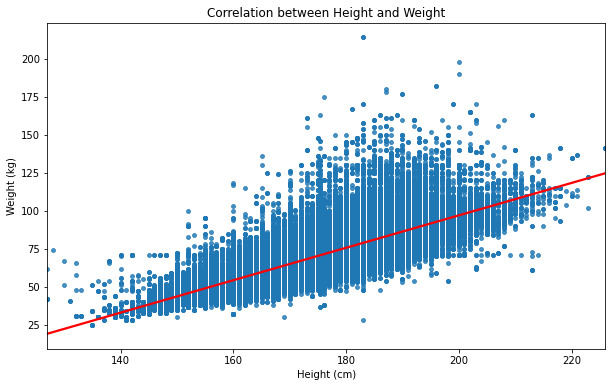

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Height', y='Weight', data=df, scatter_kws={'s':15}, line_kws={'color':'red'})
plt.title('Correlation between Height and Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Key Insights

1. The age data indicates that most athletes are in their mid-twenties, but a significant number are exactly 23 years old.
2. The height data suggesting a very consistent height among the athletes with minimal variation. 
3. Similarly, the weight data shows mean, median and mode of 70.70 kg highlighting a uniformity in weight among the athletes.
4. Age distribution and gender distribution hypothesis are proved.
4. US,Soviet Union and Germany are the top 3 winner countries.
5. Height and Weight have a strong positive correlation of 0.8, which implies that taller athletes tend to weight more. 
6. Other numerical variables age & height and age & weight has weak correlations of 0.1 and 0.2 with each other respectively.

# Recommendation

Add more features like training hours, country GDP, sports funding in the dataset to better understand athletic success 